# Classification: Performance of the Naive Bayes algorithm on the given data set
Run theNaive Bayes tool on the resulting version of **`train_gr_smpl`**. To be able to do this in Weka, you may
need to apply several Weka “Filters”. Explain the reason for choosing and using these filters. Once
you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes
(as given by the confusion matrix).

### Proportional k-interval discretization
 According to the course textbook Equal Frequency binning is excellent for Naive bayes.
 
 **Specifically when the number of bins is equal to the sqaure root of the number of instances.** This is called Proportional k-interval discretization

In a nutshell Naive Bayse should find the probability of each of the 10 classes given each pixel. 
We should expect 10 output values per instance we are predicting that sum to 1. With the highest probability being the best guess of the class attribute according to naive bayse.


* Preprocess (filter the data) data
    * normalize the data filter
    * Scipy / Keras maybe
    * Justify how / why 
* 

[See here for scikit learn naive bayse](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [2]:
from Scripts import helperfn
%load_ext autoreload
%autoreload 2

x, y = helperfn.get_data()
(x.shape, y.shape)

((9690, 2304), (9690, 1))

In [3]:
 type(x)

pandas.core.frame.DataFrame

In [4]:
x.dtypes

0       float64
1       float64
2       float64
3       float64
4       float64
         ...   
2299    float64
2300    float64
2301    float64
2302    float64
2303    float64
Length: 2304, dtype: object

In [5]:
# convert to nparray, split, and randomise
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.10, random_state=0)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8721, 2304), (8721, 1), (969, 2304), (969, 1))

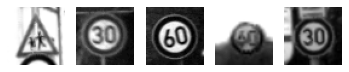

In [7]:
import matplotlib.pyplot as plt

num_images = 5

for i in range(num_images):
    row = X_train[i]
    image = row.reshape(48,48)
    plt.subplot(1, num_images, i+1)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [8]:
#X_test[618]
import numpy as np


In [9]:
from Scripts.NaiveBayse import SamNaiveBayseGaussian as nbg
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Perform Naive Bayse on random sample of full data
### Get the classifier, scores, and data used

In [10]:
classifer, scores, data = nbg.build_nbg_models(balance_classes=False)

Dataset:  -1  Has results: [0 1 2 3 4 5 6 7 8 9]
Scores for dataset:  speed limit 20
Training data score:  0.23232714138286895
Testing data score:  0.22033023735810114
--------------------------------------
Dataset:  0  Has results: [0 1]
Scores for dataset:  speed limit 30
Training data score:  0.8102425180598555
Testing data score:  0.8090815273477813
--------------------------------------
Dataset:  1  Has results: [0 1]
Scores for dataset:  speed limit 50
Training data score:  0.6606037151702786
Testing data score:  0.6656346749226006
--------------------------------------
Dataset:  2  Has results: [0 1]
Scores for dataset:  speed limit 60
Training data score:  0.6167440660474717
Testing data score:  0.6078431372549019
--------------------------------------
Dataset:  3  Has results: [0 1]
Scores for dataset:  speed limit 70
Training data score:  0.6377708978328174
Testing data score:  0.6393188854489165
--------------------------------------
Dataset:  4  Has results: [0 1]
Scores fo

### Build an np.array representing the confusion matrix:

In [11]:
train_conf, conf = nbg.build_confusion_matrix(classifer,data)

### Display the confusion matrix with kappa values

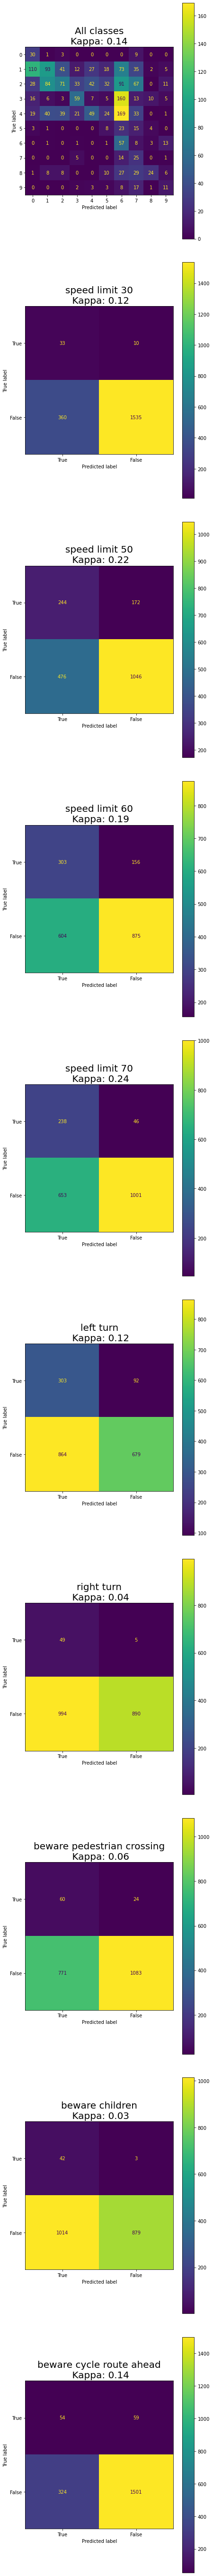

In [12]:
nbg.show_confusion_matrix(conf, kappas=nbg.kappa(conf))

## Perform Naive Bayse on datasets with a balanced class distribution

In [24]:
bal_classifer, bal_scores, bal_data = nbg.build_nbg_models(balance_classes=True)

Dataset:  -1  Has results: [0 1 2 3 4 5 6 7 8 9]
Scores for dataset:  All Classes
Training data score:  0.35714285714285715
Testing data score:  0.319047619047619
--------------------------------------
Dataset:  0  Has results: [0 1]
Scores for dataset:  speed limit 20
Training data score:  0.8005952380952381
Testing data score:  0.7976190476190477
--------------------------------------
Dataset:  1  Has results: [0 1]
Scores for dataset:  speed limit 30
Training data score:  0.6326013513513513
Testing data score:  0.6171171171171171
--------------------------------------
Dataset:  2  Has results: [0 1]
Scores for dataset:  speed limit 50
Training data score:  0.6283333333333333
Testing data score:  0.6477777777777778
--------------------------------------
Dataset:  3  Has results: [0 1]
Scores for dataset:  speed limit 60
Training data score:  0.7273936170212766
Testing data score:  0.7340425531914894
--------------------------------------
Dataset:  4  Has results: [0 1]
Scores for dat

### Build confusion matrix for balanced class distribution

In [14]:
bal_train_conf, bal_conf = nbg.build_confusion_matrix(bal_classifer, bal_data)

---------------------------------------------------------
### Display confusion matrices & their kappa values
#### Confusion matrices for Test data

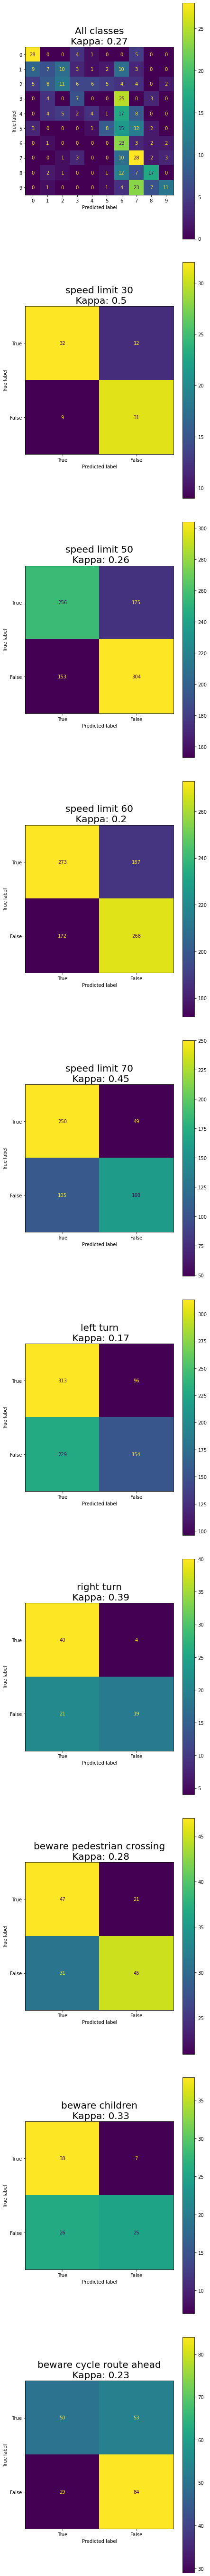

In [15]:
nbg.show_confusion_matrix(bal_conf, kappas=nbg.kappa(bal_conf))

-----------------------------------------------
#### Confusion matrices for training data

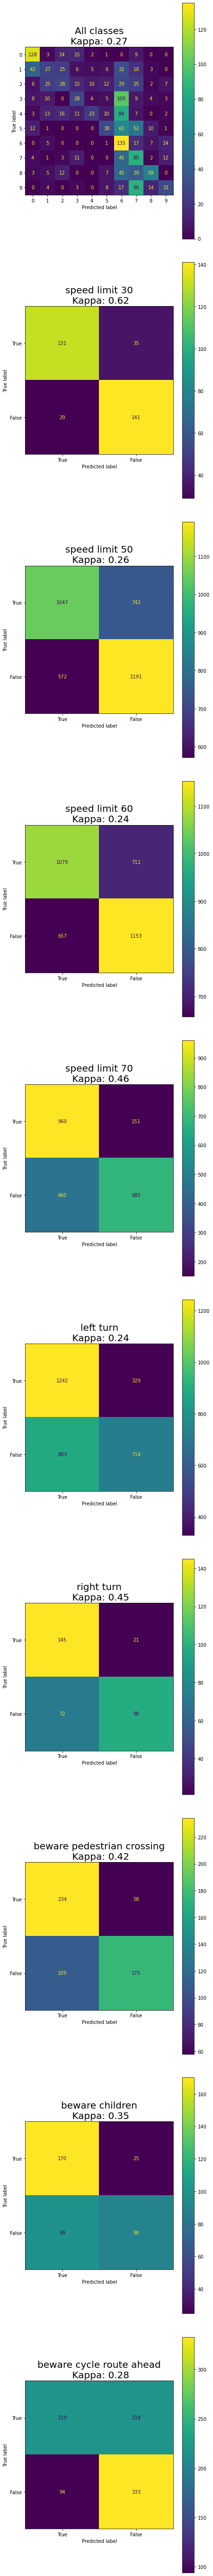

In [16]:
nbg.show_confusion_matrix(bal_train_conf, kappas=nbg.kappa(bal_train_conf))

## Testing downsampling

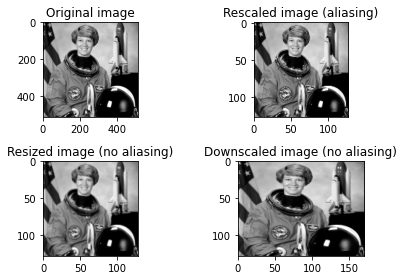

In [17]:
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

image = color.rgb2gray(data.astronaut())

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] // 4, image.shape[1] // 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [18]:
x, y = helperfn.get_data()

In [19]:
first_img = x.head(1).to_numpy()
first_img.shape

(1, 2304)

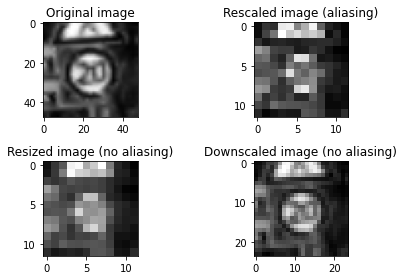

In [20]:
from Scripts import downsample as ds
ds.visualise_downsample(first_img)


In [21]:
len([bal_train_conf, conf][0])
kappa = 
#kappa

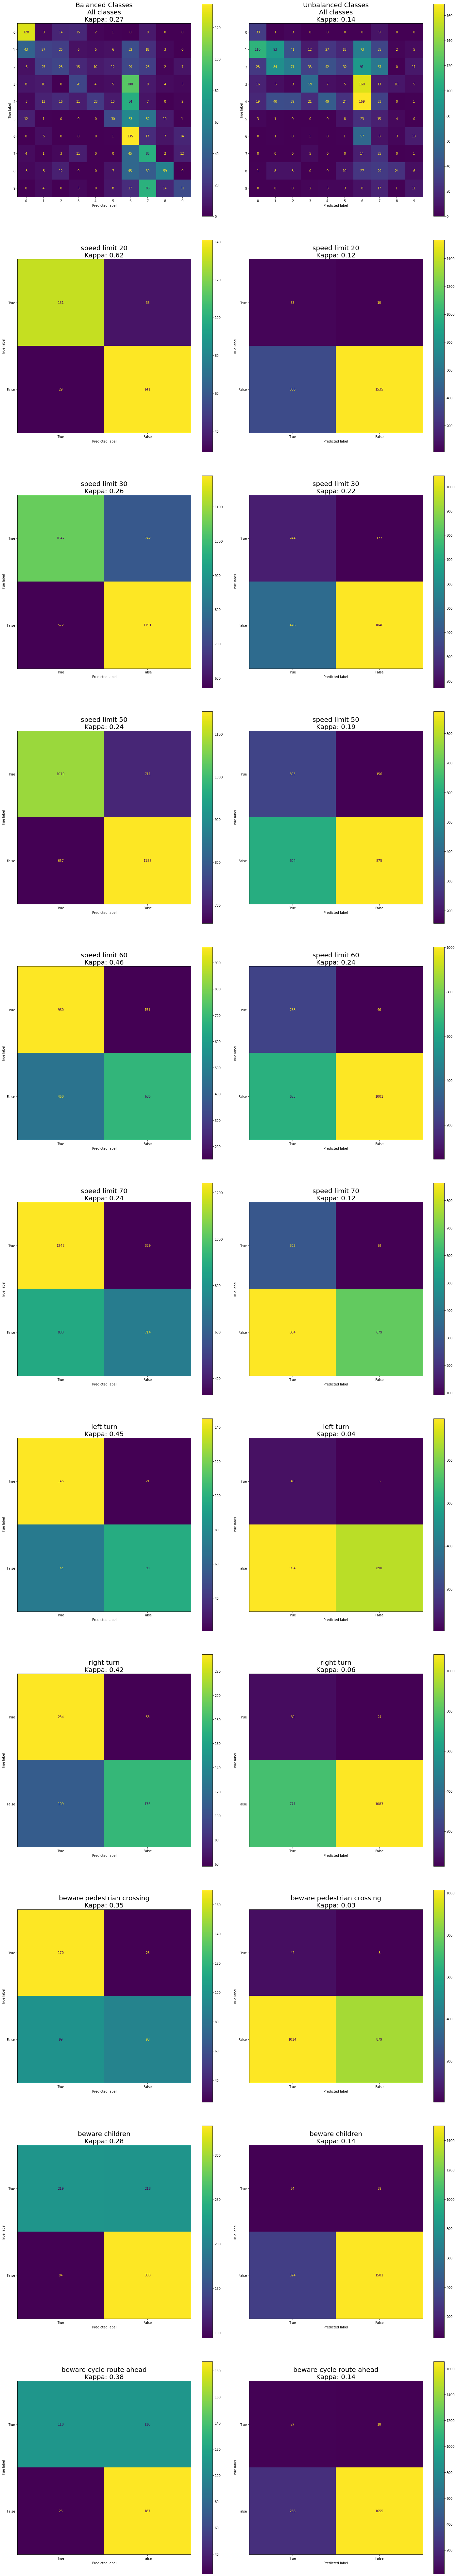

In [22]:
nbg.multi_show_confusion_matrix([bal_train_conf, conf], kappas=[nbg.kappa(bal_train_conf), nbg.kappa(conf)], col_labels=['Balanced Classes', 'Unbalanced Classes'])

In [38]:
x, y = helperfn.get_data()

downscaled_images = ds.downscale(x)
#ds.downscale_image(first_img)


In [39]:
downscaled_images.shape

(9690, 576)

In [48]:
ds_classifiers, ds_scores, ds_data = nbg.build_nbg_models(downscale=True, balance_classes=True)

Dataset:  -1  Has results: [0 1 2 3 4 5 6 7 8 9]
Scores for dataset:  All Classes
Training data score:  0.3351190476190476
Testing data score:  0.32142857142857145
--------------------------------------
Dataset:  0  Has results: [0 1]
Scores for dataset:  speed limit 20
Training data score:  0.7827380952380952
Testing data score:  0.7738095238095238
--------------------------------------
Dataset:  1  Has results: [0 1]
Scores for dataset:  speed limit 30
Training data score:  0.6337274774774775
Testing data score:  0.6430180180180181
--------------------------------------
Dataset:  2  Has results: [0 1]
Scores for dataset:  speed limit 50
Training data score:  0.6163888888888889
Testing data score:  0.6233333333333333
--------------------------------------
Dataset:  3  Has results: [0 1]
Scores for dataset:  speed limit 60
Training data score:  0.7145390070921985
Testing data score:  0.74822695035461
--------------------------------------
Dataset:  4  Has results: [0 1]
Scores for data